## Assignment 1: EDA

1. Read in `income.csv`
2. Convert the target, `SalStat` into a binary numeric variable called `target`, and build a bar chart that plots the frequency of each value.
3. Explore the numeric features using histograms or boxplots.
4. Explore the categorical features using bar charts.
5. Consider writing functions for steps 3 and 4.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

income = pd.read_csv("../Data/income.csv")

income.head()


,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [3]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


<Axes: xlabel='target'>

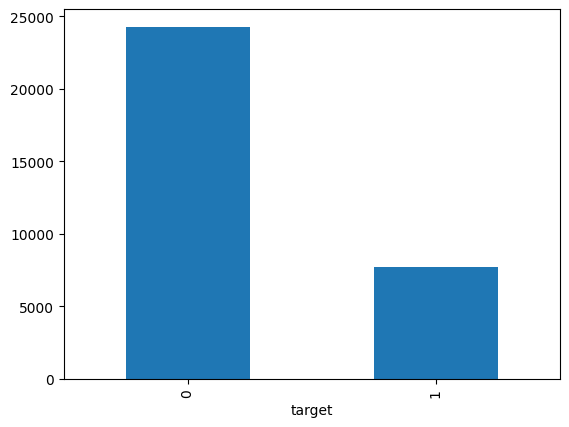

In [4]:
income["target"] = np.where(income["SalStat"] == ' less than or equal to 50,000', 0, 1)

income.value_counts("target").plot(kind="bar")

In [5]:
def num_box_plotter(data):
    for column in data.select_dtypes("number"):
        sns.boxplot(data[column]).set(ylabel=column)
        plt.show()
        

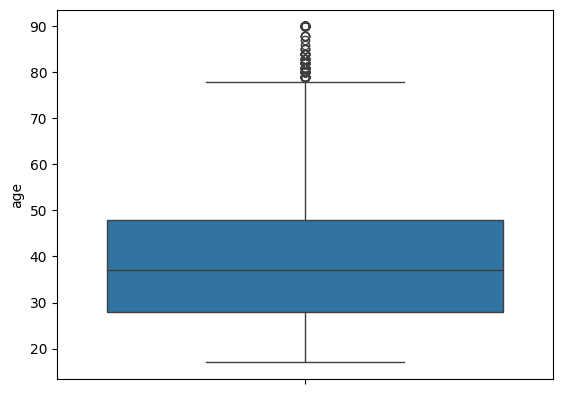

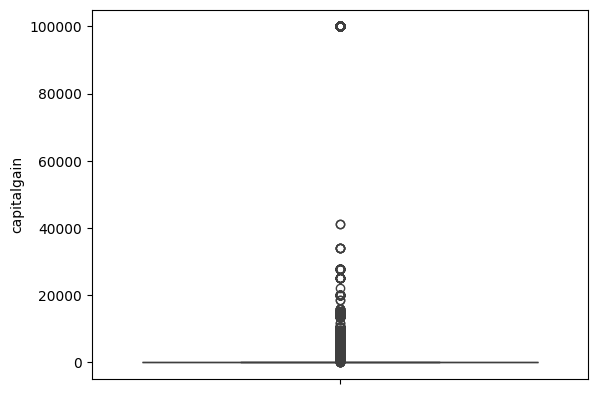

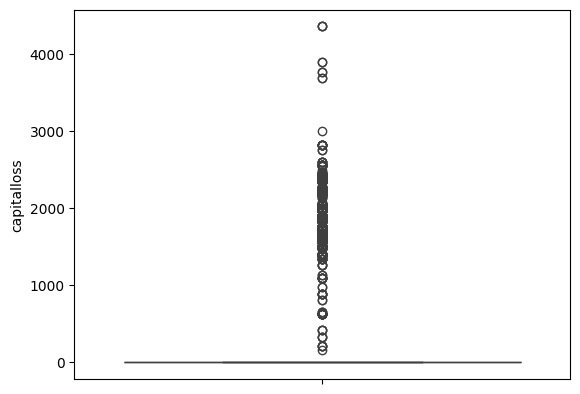

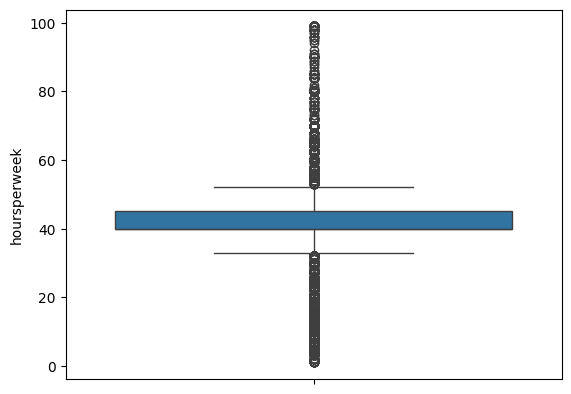

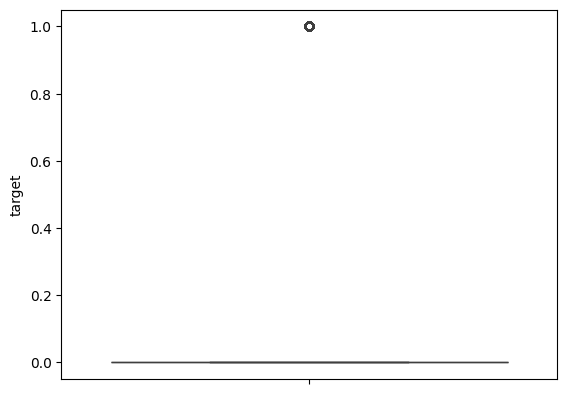

In [6]:
num_box_plotter(income)

In [7]:
def num_box_plotter(data, normalize=False):
    for column in data.select_dtypes("object"):
        data[column].value_counts(normalize=normalize).plot.bar()
        plt.show()

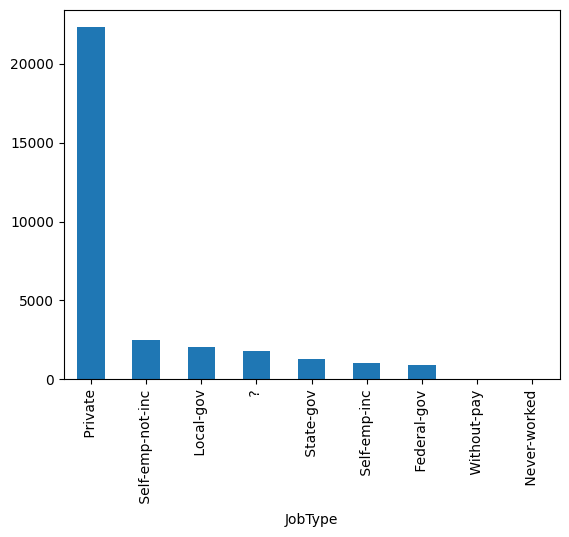

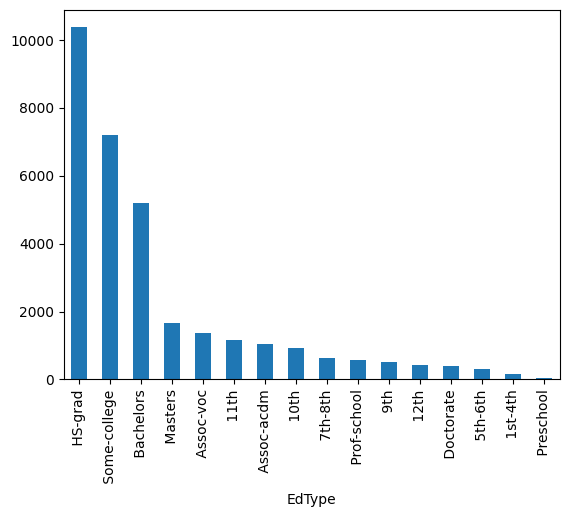

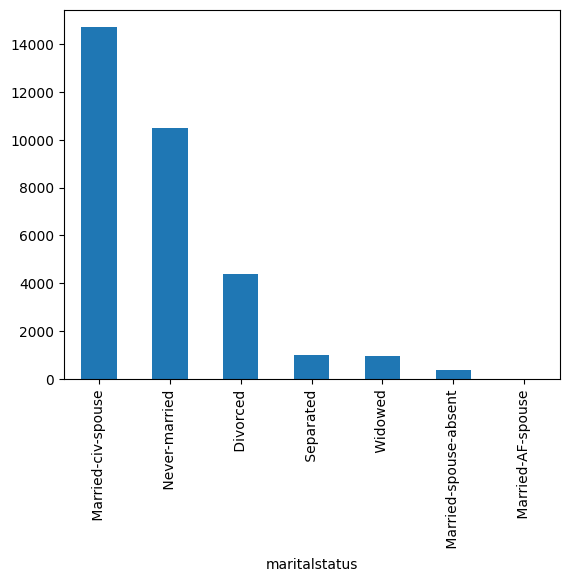

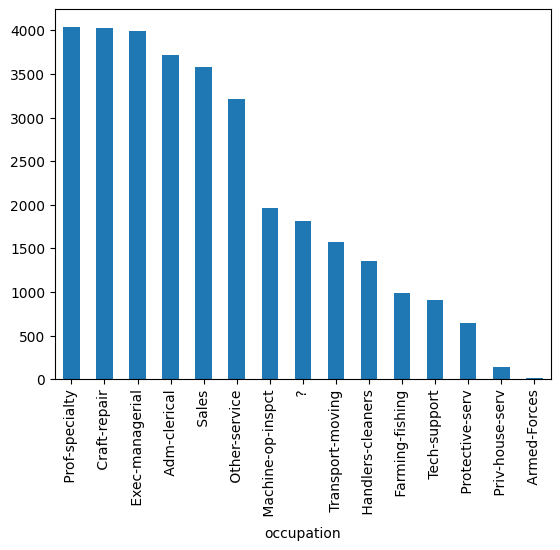

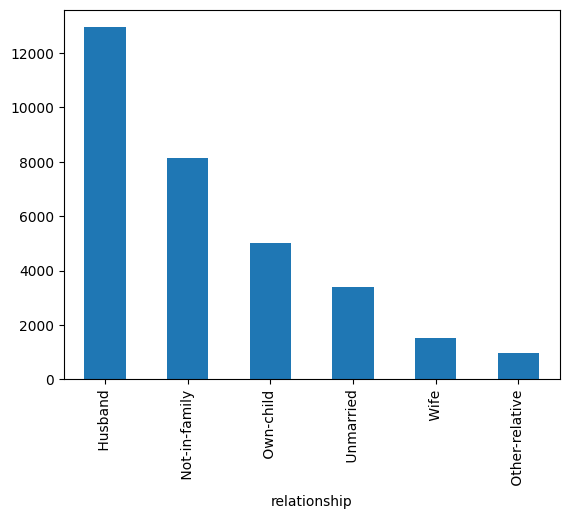

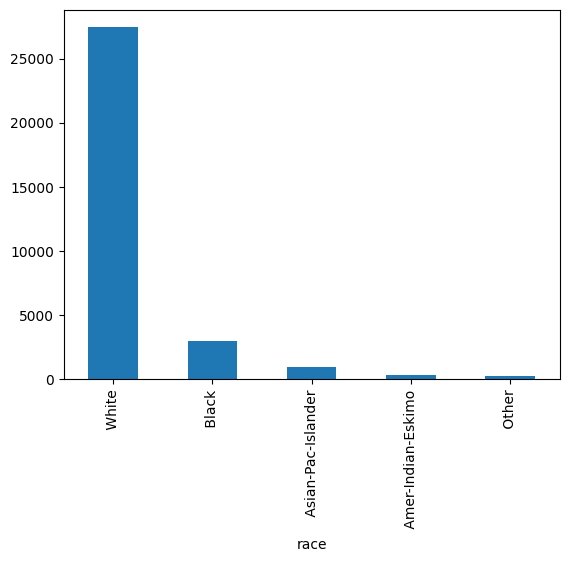

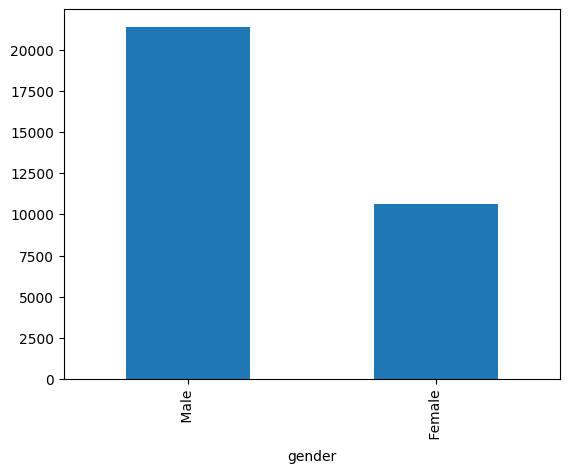

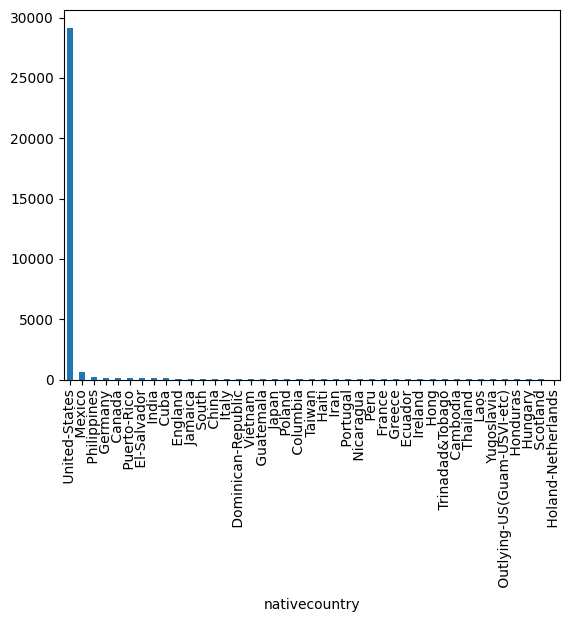

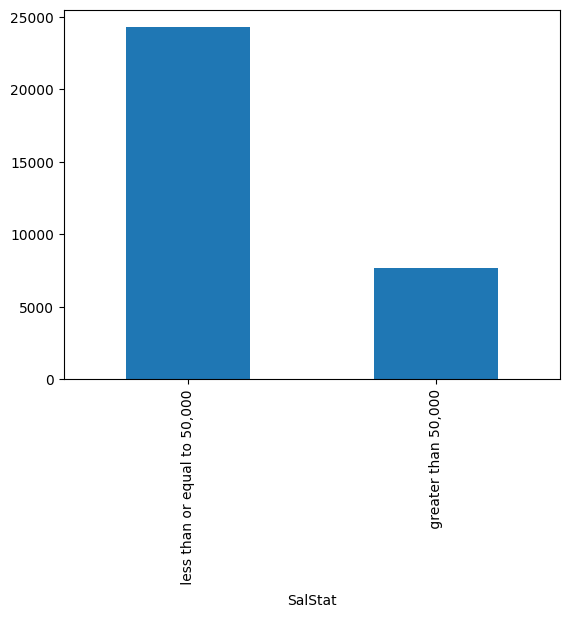

In [8]:
num_box_plotter(income)

## Assignment 2: Exploring Relationships

1. Build a Correlation Matrix Heatmap
2. Build a Pairplot
3. Write a function that calculates the mean target rate for each level of categorical variables.

<Axes: >

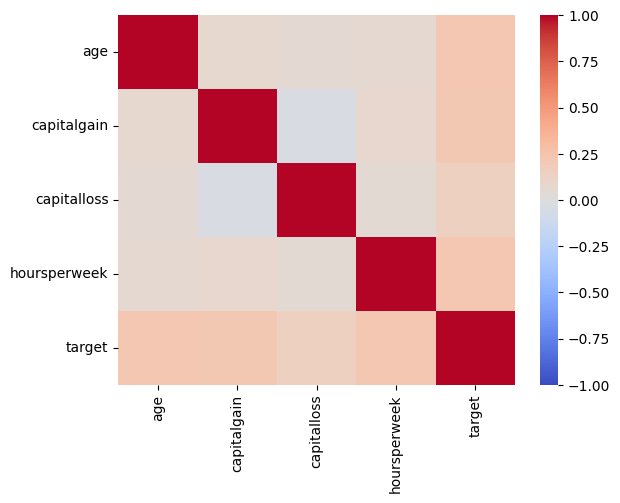

In [9]:
sns.heatmap(
    income.corr(numeric_only=True),
    vmin=-1,
    vmax=1,
    cmap="coolwarm"
)

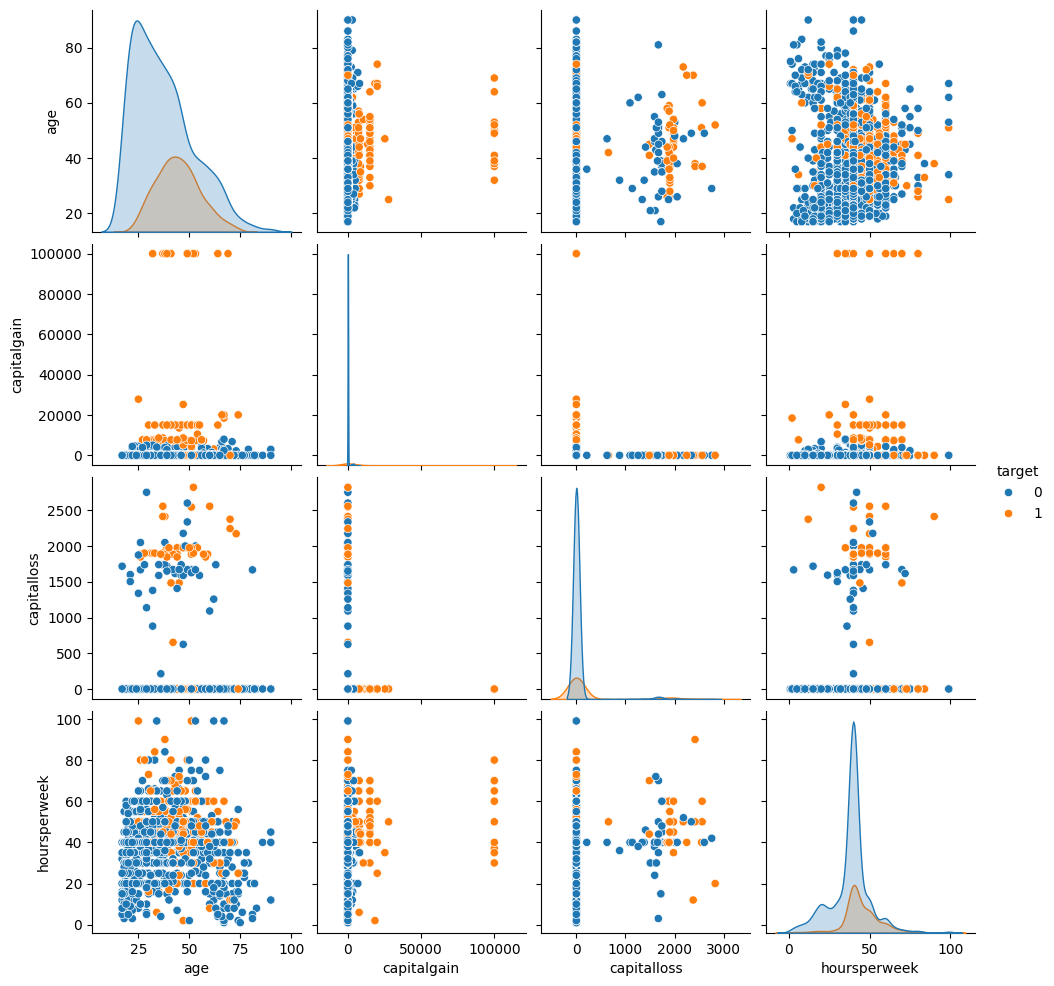

In [10]:
sns.pairplot(income.sample(2000), hue="target")

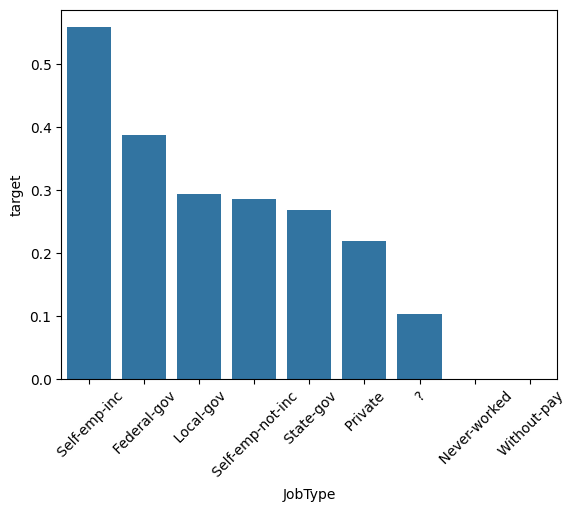

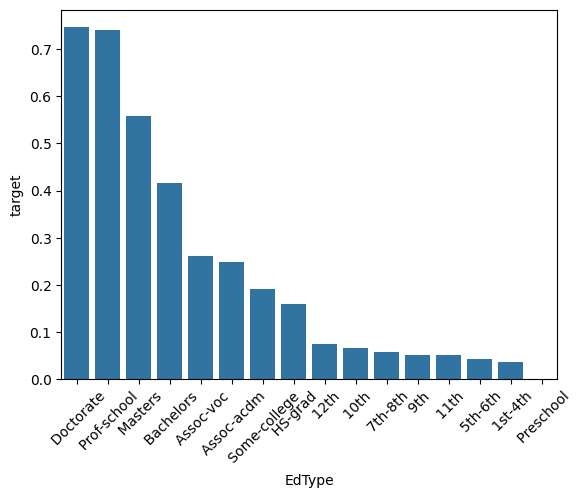

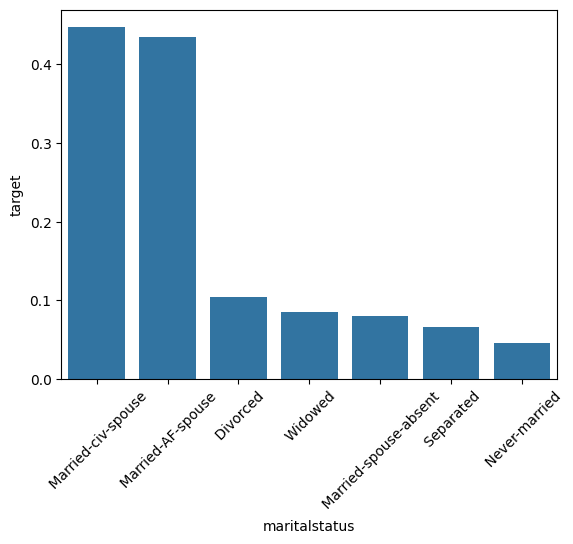

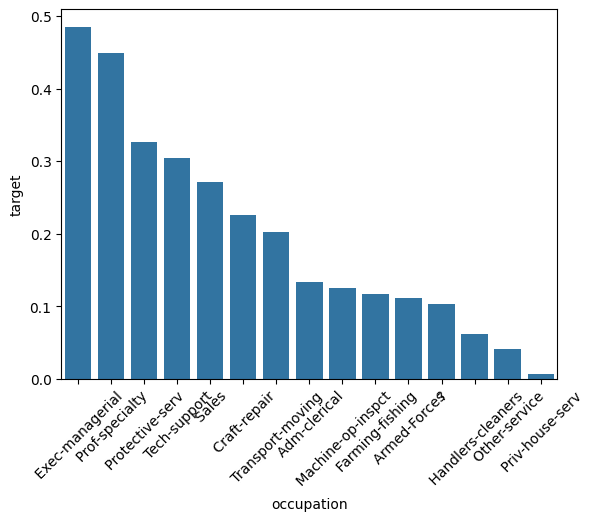

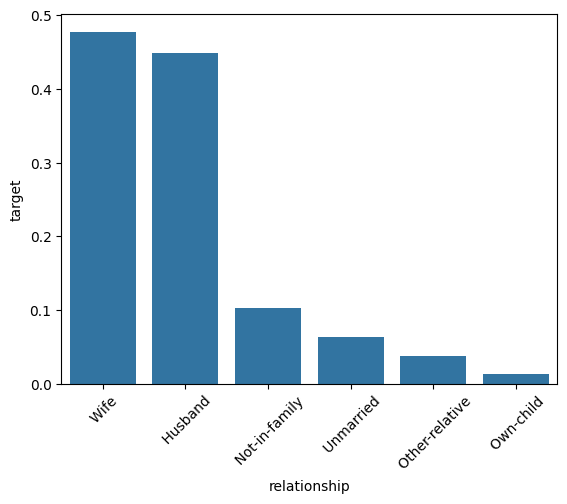

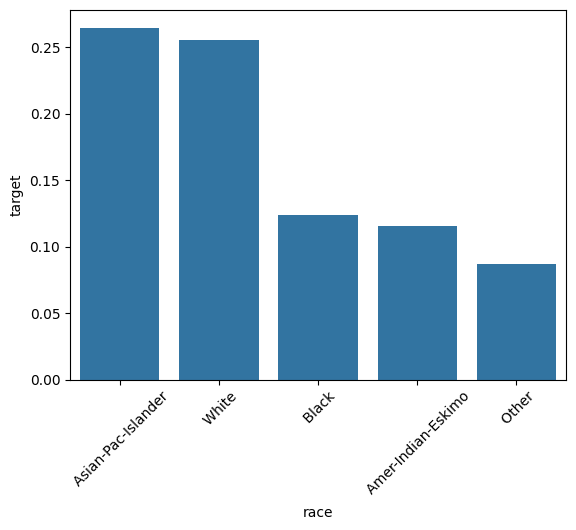

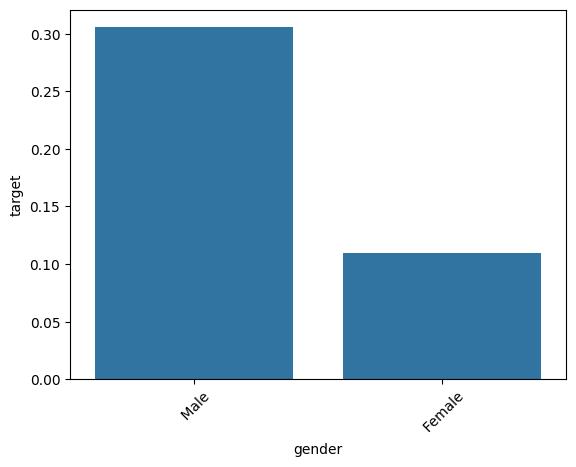

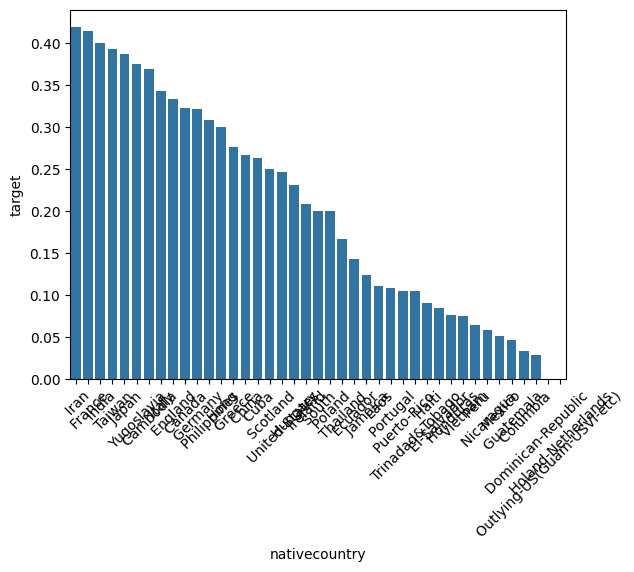

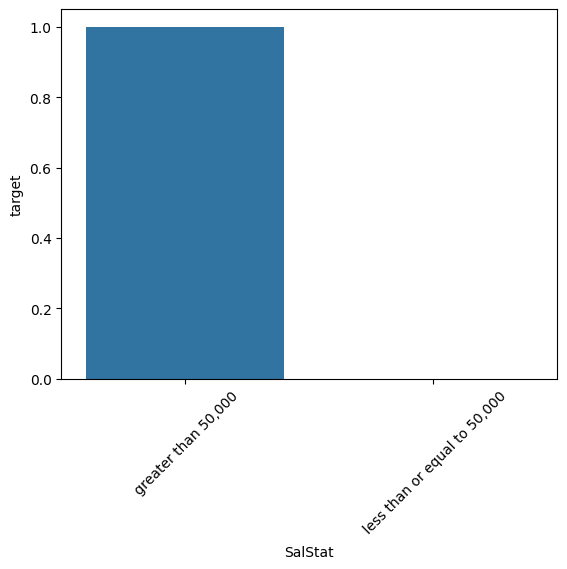

In [11]:
def cat_plotter(data, target):
    for col in data.select_dtypes(["object"]).columns:
        sns.barplot(
            data=(
                data
                .groupby(col, as_index=False)
                .agg({"target": "mean"})
                .sort_values(by="target", ascending=False)
                 ), 
            x=col, 
            y=target)
        plt.xticks(rotation=45)
        plt.show()
        
cat_plotter(income, "target")

In [12]:
def cal_mean_categorical(data):
    for column in data.select_dtypes("object"):
        print(data[column].value_counts().mean())

cal_mean_categorical(income)


3553.1111111111113
1998.625
4568.285714285715
2131.866666666667
5329.666666666667
6395.6
15989.0
779.9512195121952
15989.0


## Assignment 3: Data Prep

1. Create Dummy Variables for the categorical features - check value counts to determine if any categories need to be grouped. If there are less than 10 rows in a category, group it with a larger one.
2. Split off 20% of the data to hold out as a test set, and use the rest for training. There should be 4 datasets, one each for the features and target for the train and test sets.

In [13]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
 13  target         31978 non-null  int32 
dtypes: int32(1), int64(4), object(9)
memory usage: 3.3+ MB


In [18]:
def col_value_count():
    for i in income.select_dtypes("object"):
        print(income[i].value_counts())

col_value_count()

JobType
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
EdType
 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th               506
 12th              417
 Doctorate         390
 5th-6th           318
 1st-4th           163
 Preschool          50
Name: count, dtype: int64
maritalstatus
 Married-civ-spouse       14692
 Never-married            10488
 Divorced                  4394
 Separated                 1005
 Widowed                    979
 Married-spouse-absent      397
 Married-AF-spouse           23
Name: count, dtype: int64
occupation
 Prof-specialty       4038
 Craft-repair       

In [19]:
income = income.assign(
    nativecountry = income["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
    occupation = income["occupation"].replace({" Armed-Forces": " ?"}),
    JobType = income["JobType"].replace({" Never-worked": " Without-pay"}),
)

col_value_count()

JobType
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            21
Name: count, dtype: int64
EdType
 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th               506
 12th              417
 Doctorate         390
 5th-6th           318
 1st-4th           163
 Preschool          50
Name: count, dtype: int64
maritalstatus
 Married-civ-spouse       14692
 Never-married            10488
 Divorced                  4394
 Separated                 1005
 Widowed                    979
 Married-spouse-absent      397
 Married-AF-spouse           23
Name: count, dtype: int64
occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial    

In [20]:
income = pd.get_dummies(income, drop_first=True)

income

,age,capitalgain,capitalloss,hoursperweek,target,JobType_ Federal-gov,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,...,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,"SalStat_ less than or equal to 50,000"
0,45,0,0,28,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
1,24,0,0,40,0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,44,0,0,40,1,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,27,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,20,0,0,35,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
31974,34,0,0,40,0,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
31975,23,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
31976,42,0,0,40,0,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [21]:
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1),
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop("SalStat", axis=1), 
        drop_first=True
    )
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [23]:
income = pd.read_csv("../Data/income.csv")
X_train, X_test, y_train, y_test = income_model_prep(income)

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25582 entries, 2337 to 2732
Data columns (total 94 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        25582 non-null  int64
 1   capitalgain                                25582 non-null  int64
 2   capitalloss                                25582 non-null  int64
 3   hoursperweek                               25582 non-null  int64
 4   JobType_ Federal-gov                       25582 non-null  bool 
 5   JobType_ Local-gov                         25582 non-null  bool 
 6   JobType_ Private                           25582 non-null  bool 
 7   JobType_ Self-emp-inc                      25582 non-null  bool 
 8   JobType_ Self-emp-not-inc                  25582 non-null  bool 
 9   JobType_ State-gov                         25582 non-null  bool 
 10  JobType_ Without-pay                       25582 